## Unballanced dataset Preprocessing

In [154]:
# Importing necessary libraries

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')

In [155]:
df = pd.read_csv('datasets/data3_synthetic_raw.csv', sep=';')

In [156]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.160000,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.510000,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.000000,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.490000,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.990000,634,0,0,0


In [157]:
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1754155.000000,1754155.000000,1754155.000000,1754155.000000,1754155.000000,1754155.000000,1754155.000000,1754155.000000
mean,877077.000000,2504.011402,4996.733153,53.632302,7903233.708572,90.972603,0.008369,0.018824
std,506381.075062,1445.986939,2886.100540,42.326492,4565172.383900,52.837091,0.091100,0.211326
min,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000
25%,438538.500000,1252.000000,2502.000000,21.010000,3940846.500000,45.000000,0.000000,0.000000
50%,877077.000000,2506.000000,4994.000000,44.640000,7902670.000000,91.000000,0.000000,0.000000
75%,1315615.500000,3765.000000,7495.000000,76.950000,11865661.500000,137.000000,0.000000,0.000000
max,1754154.000000,4999.000000,9999.000000,2628.000000,15811197.000000,182.000000,1.000000,3.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB


### Adjusting TX_DATETIME to seconds since first transaction

In [159]:
# Convert 'TX_DATETIME' to datetime. All other variables have correct datatype
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Find the minimum datetime value
min_datetime = df['TX_DATETIME'].min()

# Calculate seconds since the first transaction for each row
df['Time'] = (df['TX_DATETIME'] - min_datetime).dt.total_seconds()

df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,Time
0,0,2018-04-01 00:00:31,596,3156,57.160000,31,0,0,0,0.000000
1,1,2018-04-01 00:02:10,4961,3412,81.510000,130,0,0,0,99.000000
2,2,2018-04-01 00:07:56,2,1365,146.000000,476,0,0,0,445.000000
3,3,2018-04-01 00:09:29,4128,8737,64.490000,569,0,0,0,538.000000
4,4,2018-04-01 00:10:34,927,9906,50.990000,634,0,0,0,603.000000


In [160]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values()
total

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
Time                 0
dtype: int64

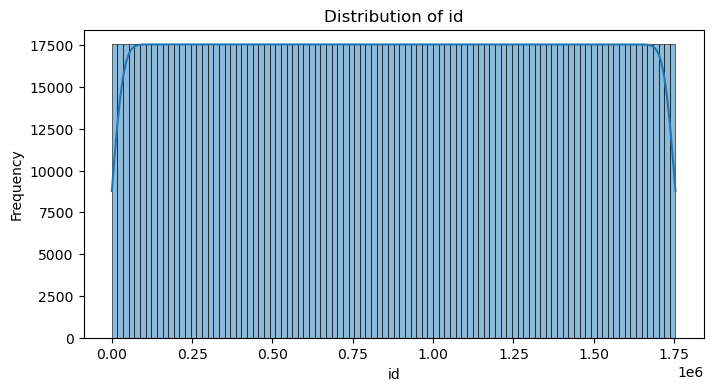

In [161]:
# Distribution of id
plt.figure(figsize=(8, 4))
sns.histplot(df['TRANSACTION_ID'], bins=100, kde=True)
plt.title('Distribution of id')
plt.xlabel('id')
plt.ylabel('Frequency')
plt.show()

In [162]:
# Dropping TRANSACTION_ID and TX_TIME_SECONDS column as it is redundant and old not converted TX_DATETIME
df.drop(['TRANSACTION_ID','TX_DATETIME','TX_TIME_SECONDS'], axis=1, inplace=True)
df.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,Time
0,596,3156,57.160000,0,0,0,0.000000
1,4961,3412,81.510000,0,0,0,99.000000
2,2,1365,146.000000,0,0,0,445.000000
3,4128,8737,64.490000,0,0,0,538.000000
4,927,9906,50.990000,0,0,0,603.000000


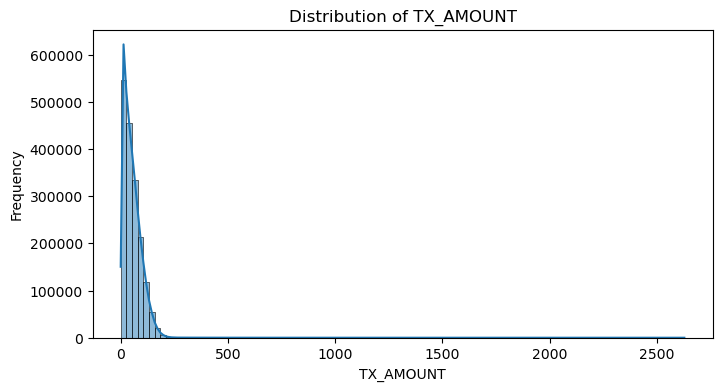

In [163]:
# Distribution of 
plt.figure(figsize=(8, 4))
sns.histplot(df['TX_AMOUNT'], bins=100, kde=True)
plt.title('Distribution of TX_AMOUNT')
plt.xlabel('TX_AMOUNT')
plt.ylabel('Frequency')
plt.show()

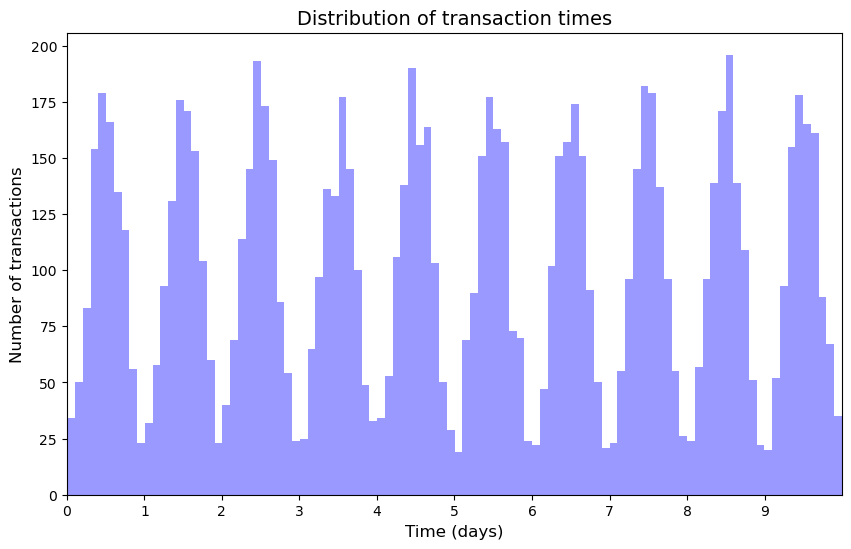

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample selection
time_val = df[df.TX_TIME_DAYS<10]['Time'].sample(n=10000).values

# Create the plot
plt.figure(figsize=(10, 6)) # Adjust the size as needed
ax = sns.distplot(time_val/86400, color='b', bins=100, hist=True, kde=False)

# Now use the ax object to set titles and labels
ax.set_title('Distribution of transaction times', fontsize=14)
ax.set_xlim([min(time_val/86400), max(time_val/86400)])
ax.set_xticks(np.arange(0, 10, 1))  # Corrected to use numpy for generating a range of numbers including 0
ax.set_xlabel("Time (days)", fontsize=12)  # Fixed method call
ax.set_ylabel("Number of transactions", fontsize=12)

plt.show()

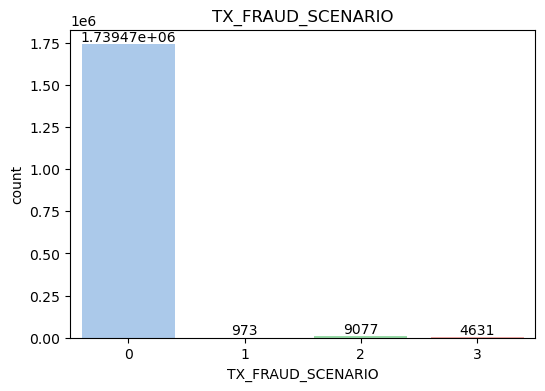

In [182]:
plt.figure(figsize=(6,4))
plt.title('TX_FRAUD_SCENARIO')
ax = sns.countplot(x='TX_FRAUD_SCENARIO',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

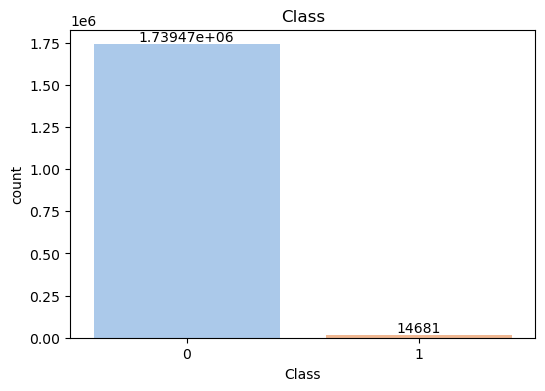

In [183]:
# Creating class variable to flag all frauds as 1 and non frauds as 0.
# Create the 'Class' column based on 'TX_FRAUD_SCENARIO'
df['Class'] = np.where(df['TX_FRAUD_SCENARIO'] > 0, 1, 0)

plt.figure(figsize=(6,4))
plt.title('Class')
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

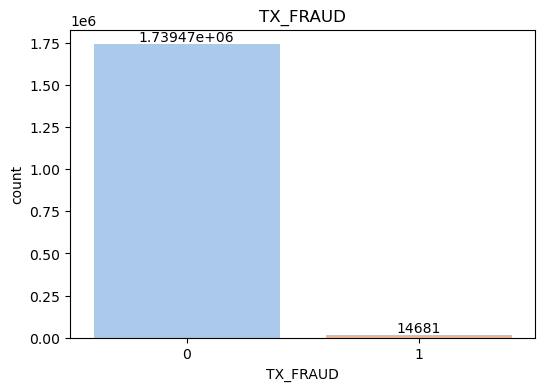

In [184]:
# Creating class variable to flag all frauds as 1 and non frauds as 0.
# Create the 'Class' column based on 'TX_FRAUD_SCENARIO'

plt.figure(figsize=(6,4))
plt.title('TX_FRAUD')
ax = sns.countplot(x='TX_FRAUD',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [185]:
# Dropping TX_FRAUD_SCENARIO column as it is redundant
df.drop(['TX_FRAUD_SCENARIO','TX_FRAUD'], axis=1, inplace=True)
df.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_DAYS,Time,Class
0,596,3156,57.160000,0,0.000000,0
1,4961,3412,81.510000,0,99.000000,0
2,2,1365,146.000000,0,445.000000,0
3,4128,8737,64.490000,0,538.000000,0
4,927,9906,50.990000,0,603.000000,0


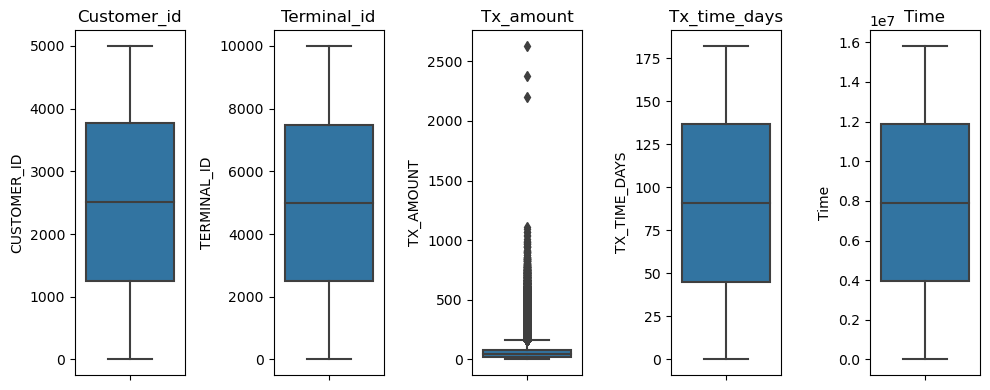

In [186]:
# Box plots
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['CUSTOMER_ID','TERMINAL_ID','TX_AMOUNT','TX_TIME_DAYS','Time']
n_cols = len(columns_to_plot)

fig, axes = plt.subplots(1, n_cols, figsize=(10, 4), sharey=False)

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()}')

plt.tight_layout()
plt.show()

### Amount has a lot of values at around 100 and many outliers up to 2600. All other variables are equally and normally distributed.

## Outlier handling
Not needed, as dataset is synthetic.

In [187]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Normal_share= 99.16307281853656 
 Fraud_share= 0.8369271814634397
 Imbalance Percentage = 0.843990769623461


In [188]:
# Creating sub dataframes

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

fraud_df.head()

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=2)

new_df.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_DAYS,Time,Class
1312182,4267,6041,85.340000,136,11814687.000000,1
1636899,3291,4478,6.160000,170,14745687.000000,1
900229,4167,2353,28.920000,93,8097707.000000,1
1618183,1536,8935,131.460000,168,14576611.000000,1
162056,3615,7151,10.520000,16,1451774.000000,1


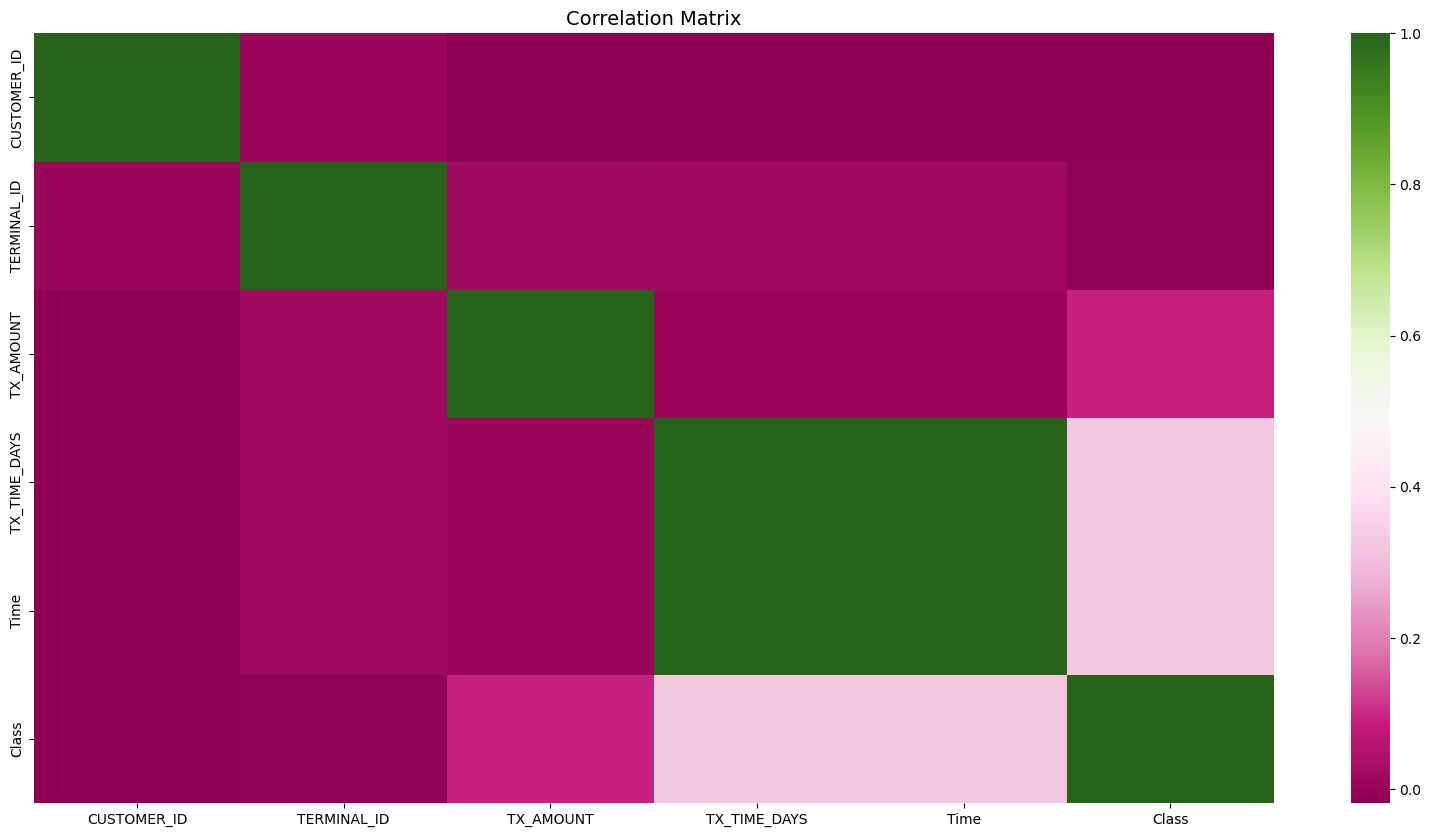

In [189]:
# Correlation matrix

f, ax2 = plt.subplots(1, 1, figsize=(20, 10))

sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr, cmap='PiYG', annot_kws={'size': 18}, ax=ax2)

ax2.set_title('Correlation Matrix', fontsize=14)

plt.show()

### Class has strong negative correlation with Customer ID and Terminal ID. A little bit weaker negative correlation with Amount and negligable correlation with TX TIME and Time variables. Other variables are also negatively correlated.

## Scaling all variables for modeling

In [190]:
#CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, TX_TIME_DAYS, Time 
from sklearn.preprocessing import RobustScaler

# Scale 'TX_AMOUNT' and 'Time' using RobustScaler and create new scaled columns
df['V1'] = rob_scaler.fit_transform(df[['TX_AMOUNT']])
df['V2'] = rob_scaler.fit_transform(df[['Time']].values.reshape(-1,1))
df['V3'] = rob_scaler.fit_transform(df[['CUSTOMER_ID']])
df['V4'] = rob_scaler.fit_transform(df[['TERMINAL_ID']])
df['V5'] = rob_scaler.fit_transform(df[['TX_TIME_DAYS']].values.reshape(-1,1))

df.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_DAYS,Time,Class,V1,V2,V3,V4,V5
0,596,3156,57.160000,0,0.000000,0,0.223811,-0.997202,-0.760048,-0.368115,-0.989130
1,4961,3412,81.510000,0,99.000000,0,0.659099,-0.997189,0.976920,-0.316844,-0.989130
2,2,1365,146.000000,0,445.000000,0,1.811941,-0.997146,-0.996419,-0.726818,-0.989130
3,4128,8737,64.490000,0,538.000000,0,0.354844,-0.997134,0.645444,0.749650,-0.989130
4,927,9906,50.990000,0,603.000000,0,0.113514,-0.997126,-0.628333,0.983777,-0.989130


In [191]:
# Dropping TRANSACTION_ID and TX_TIME_SECONDS column as it is redundant and old not converted TX_DATETIME
df.drop(['CUSTOMER_ID','TERMINAL_ID','TX_AMOUNT','TX_TIME_DAYS','Time'], axis=1, inplace=True)
df.head()

,Class,V1,V2,V3,V4,V5
0,0,0.223811,-0.997202,-0.760048,-0.368115,-0.989130
1,0,0.659099,-0.997189,0.976920,-0.316844,-0.989130
2,0,1.811941,-0.997146,-0.996419,-0.726818,-0.989130
3,0,0.354844,-0.997134,0.645444,0.749650,-0.989130
4,0,0.113514,-0.997126,-0.628333,0.983777,-0.989130


In [192]:
df.describe()

,Class,V1,V2,V3,V4,V5
count,1754155.000000,1754155.000000,1754155.000000,1754155.000000,1754155.000000,1754155.000000
mean,0.008369,0.160749,0.000071,-0.000791,0.000547,-0.000298
std,0.091100,0.756641,0.576060,0.575403,0.578029,0.574316
min,0.000000,-0.797998,-0.997202,-0.997214,-1.000200,-0.989130
25%,0.000000,-0.422417,-0.499926,-0.499005,-0.499099,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.577583,0.500074,0.500995,0.500901,0.500000
max,1.000000,46.180908,0.997945,0.992041,1.002403,0.989130


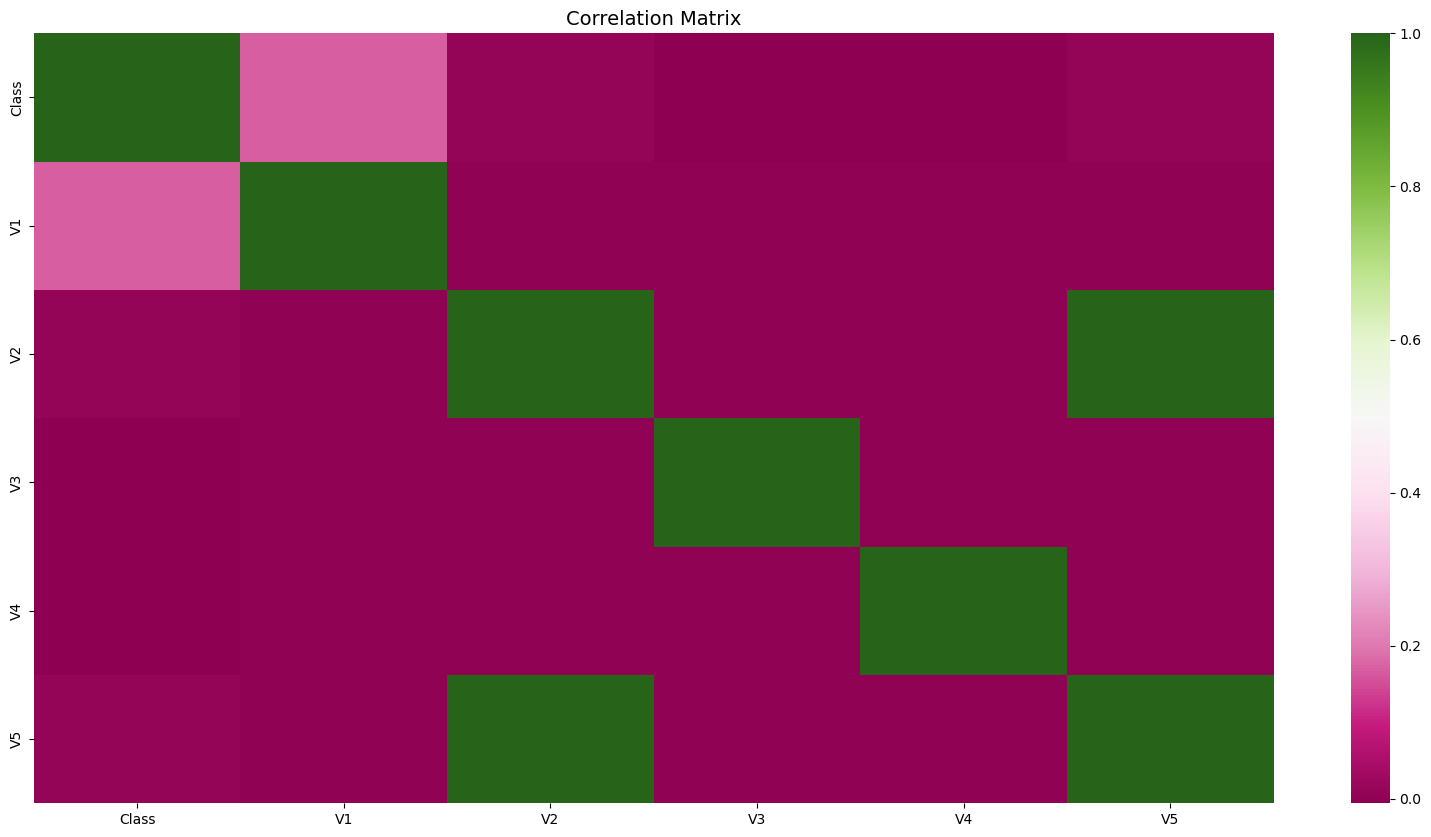

In [193]:
# Correlation matrix

f, ax2 = plt.subplots(1, 1, figsize=(20, 10))

sub_sample_corr = df.corr()

sns.heatmap(sub_sample_corr, cmap='PiYG', annot_kws={'size': 18}, ax=ax2)

ax2.set_title('Correlation Matrix', fontsize=14)

plt.show()

## Exporting preprocessed dataset

In [194]:
df.to_csv('datasets/data3_synthetic.csv', index=False)